# Disease Classification using Machine Learning

# Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
    - [Libraries and Datasets](#Libraries-and-Datasets)
3. [Data Inspection](#Data-Inspection)
    - [Initial Data Exploration](#Initial-Data-Exploration)
    - [Shape and Data Types](#Shape-and-Data-Types)
    - [Missing Values](#Missing-Values)
    - [Distribution of Prognoses](#distribution-of-prognoses)
    - [Summary Statistics](#Summary-Statistics)
4. [Symptom Frequency Distribution](#Symptom-Frequency-Distribution)

# Introduction
<a id="Introduction"></a>

The primary objective of this project is to develop a machine-learning model that can accurately classify and cluster diseases based on patient's symptoms. This can be used to a helping tool for medical staff to help patients all around the world. Best features should be identifies while creating of the ML model.

## Data Loading


##### Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
import missingno as msno

In [2]:
train_data = pd.read_csv("data/Training.csv")
test_data = pd.read_csv("data/Testing.csv")

# Data Inspection
<a id="Data-Inspection"></a>
## Initial Data Exploration
<a id="Initial-Data-Exploration"></a>


We will inspect the first few columns of the dataset to gather some information at a glance. 

In [4]:
train_data.head(10) 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


The data seems to come in binary format for each variable. 1 indicates the presence of a symptom, while 0 indicates its absence. There are two columns we want to get rid of:
- **fluid_overload:** Contains all 0s as values. Duplicated as fluid_overload.1, which will be retained in the dataset. 
- **Unnamed: 133:** Blank final column of the dataset, contains no information so it will be removed. 

In [24]:
train_data = train_data[train_data.columns.difference(['Unnamed: 133', 'fluid_overload']).tolist()] # replacing the data with the columns we actually want 

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, abdominal_pain to yellowish_skin
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


## Shape and Data Types
<a id="Shape-and-Data-Types"></a>

In [73]:
print(f"The training dataset has a shape of {train_data.shape}, which can be broken down into a total of {train_data.shape[0]} rows and {train_data.shape[1]} columns. \nThis means that there are {train_data.shape[1] - 1} predictor variables. \nWithin the prognosis column, there are {len(train_data['prognosis'].unique())} diseases included.")

The training dataset has a shape of (4920, 132), which can be broken down into a total of 4920 rows and 132 columns. 
This means that there are 131 predictor variables. 
Within the prognosis column, there are 41 diseases included.


In [83]:
print("\nColumn names and their data types:")
dtypes = pd.DataFrame(train_data.dtypes, columns=['Data Type'])
dtypes.index.name = 'Column Name'
dtypes.groupby('Data Type').size().to_frame()



Column names and their data types:


,0
Data Type,
int64,131
object,1


The 131 symptoms are integers, while the prognosis is a string, registered as an object here.

## Missing Values
<a id="Missing-Values"></a>

In [78]:
mvals = pd.DataFrame(train_data.isnull().sum(), columns=['Missing Values'])
total_missing = len(mvals[mvals['Missing Values']>0])

print(f'The dataset has {total_missing} columns with missing values present.')

The dataset has 0 columns with missing values present.


## Distribution of Prognoses 
<a id="distribution-of-prognoses"></a>

<Axes: xlabel='prognosis'>

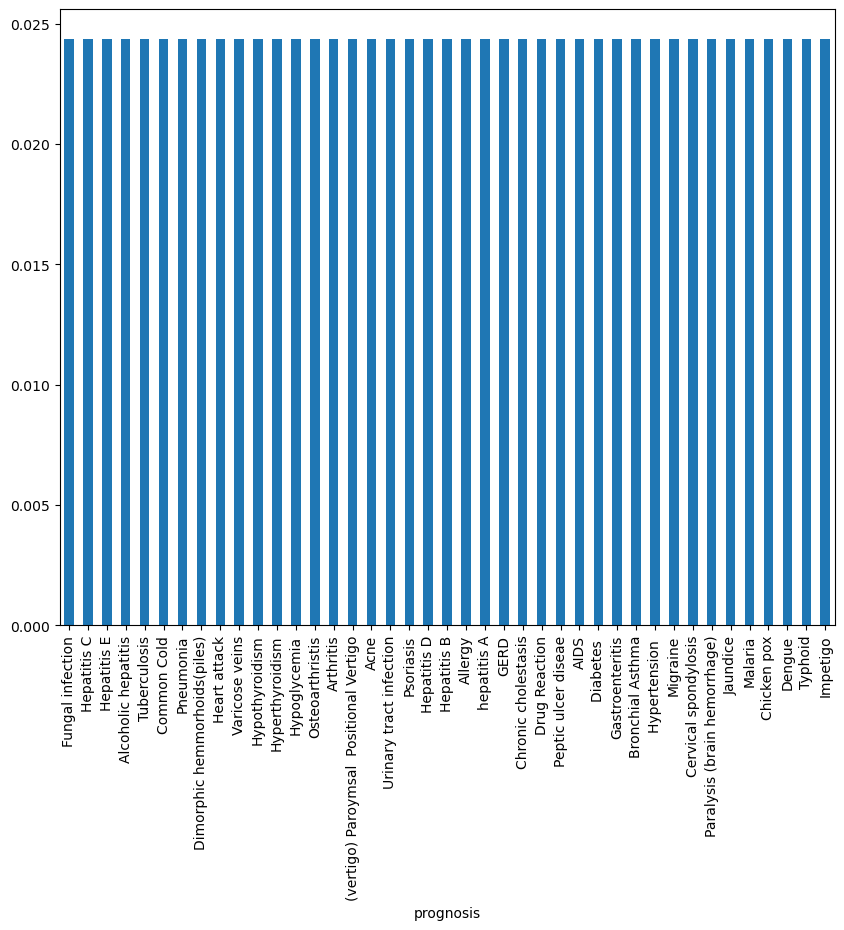

In [82]:
train_data['prognosis'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8))

According to the plot, the available classes within the prognosis dataset are evenly distributed.

## Summary Statistics
<a id="Summary-Statistics"></a>


As each predictor column is encoded in binary format, we do not expect the summary statistics for the columns to provide meaningful insights. The minimum and maximum values will remain 0 and 1 respectively, while the means and standard deviations are generally not meaningful in the context of building a model. 

## Symptom Frequency Distribution
<a id="Symptom-Frequency-Distribution"></a>

In [ ]:
value_columns = train_data.columns.difference(['prognosis']).tolist()
melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns)

## Correlation Matrix

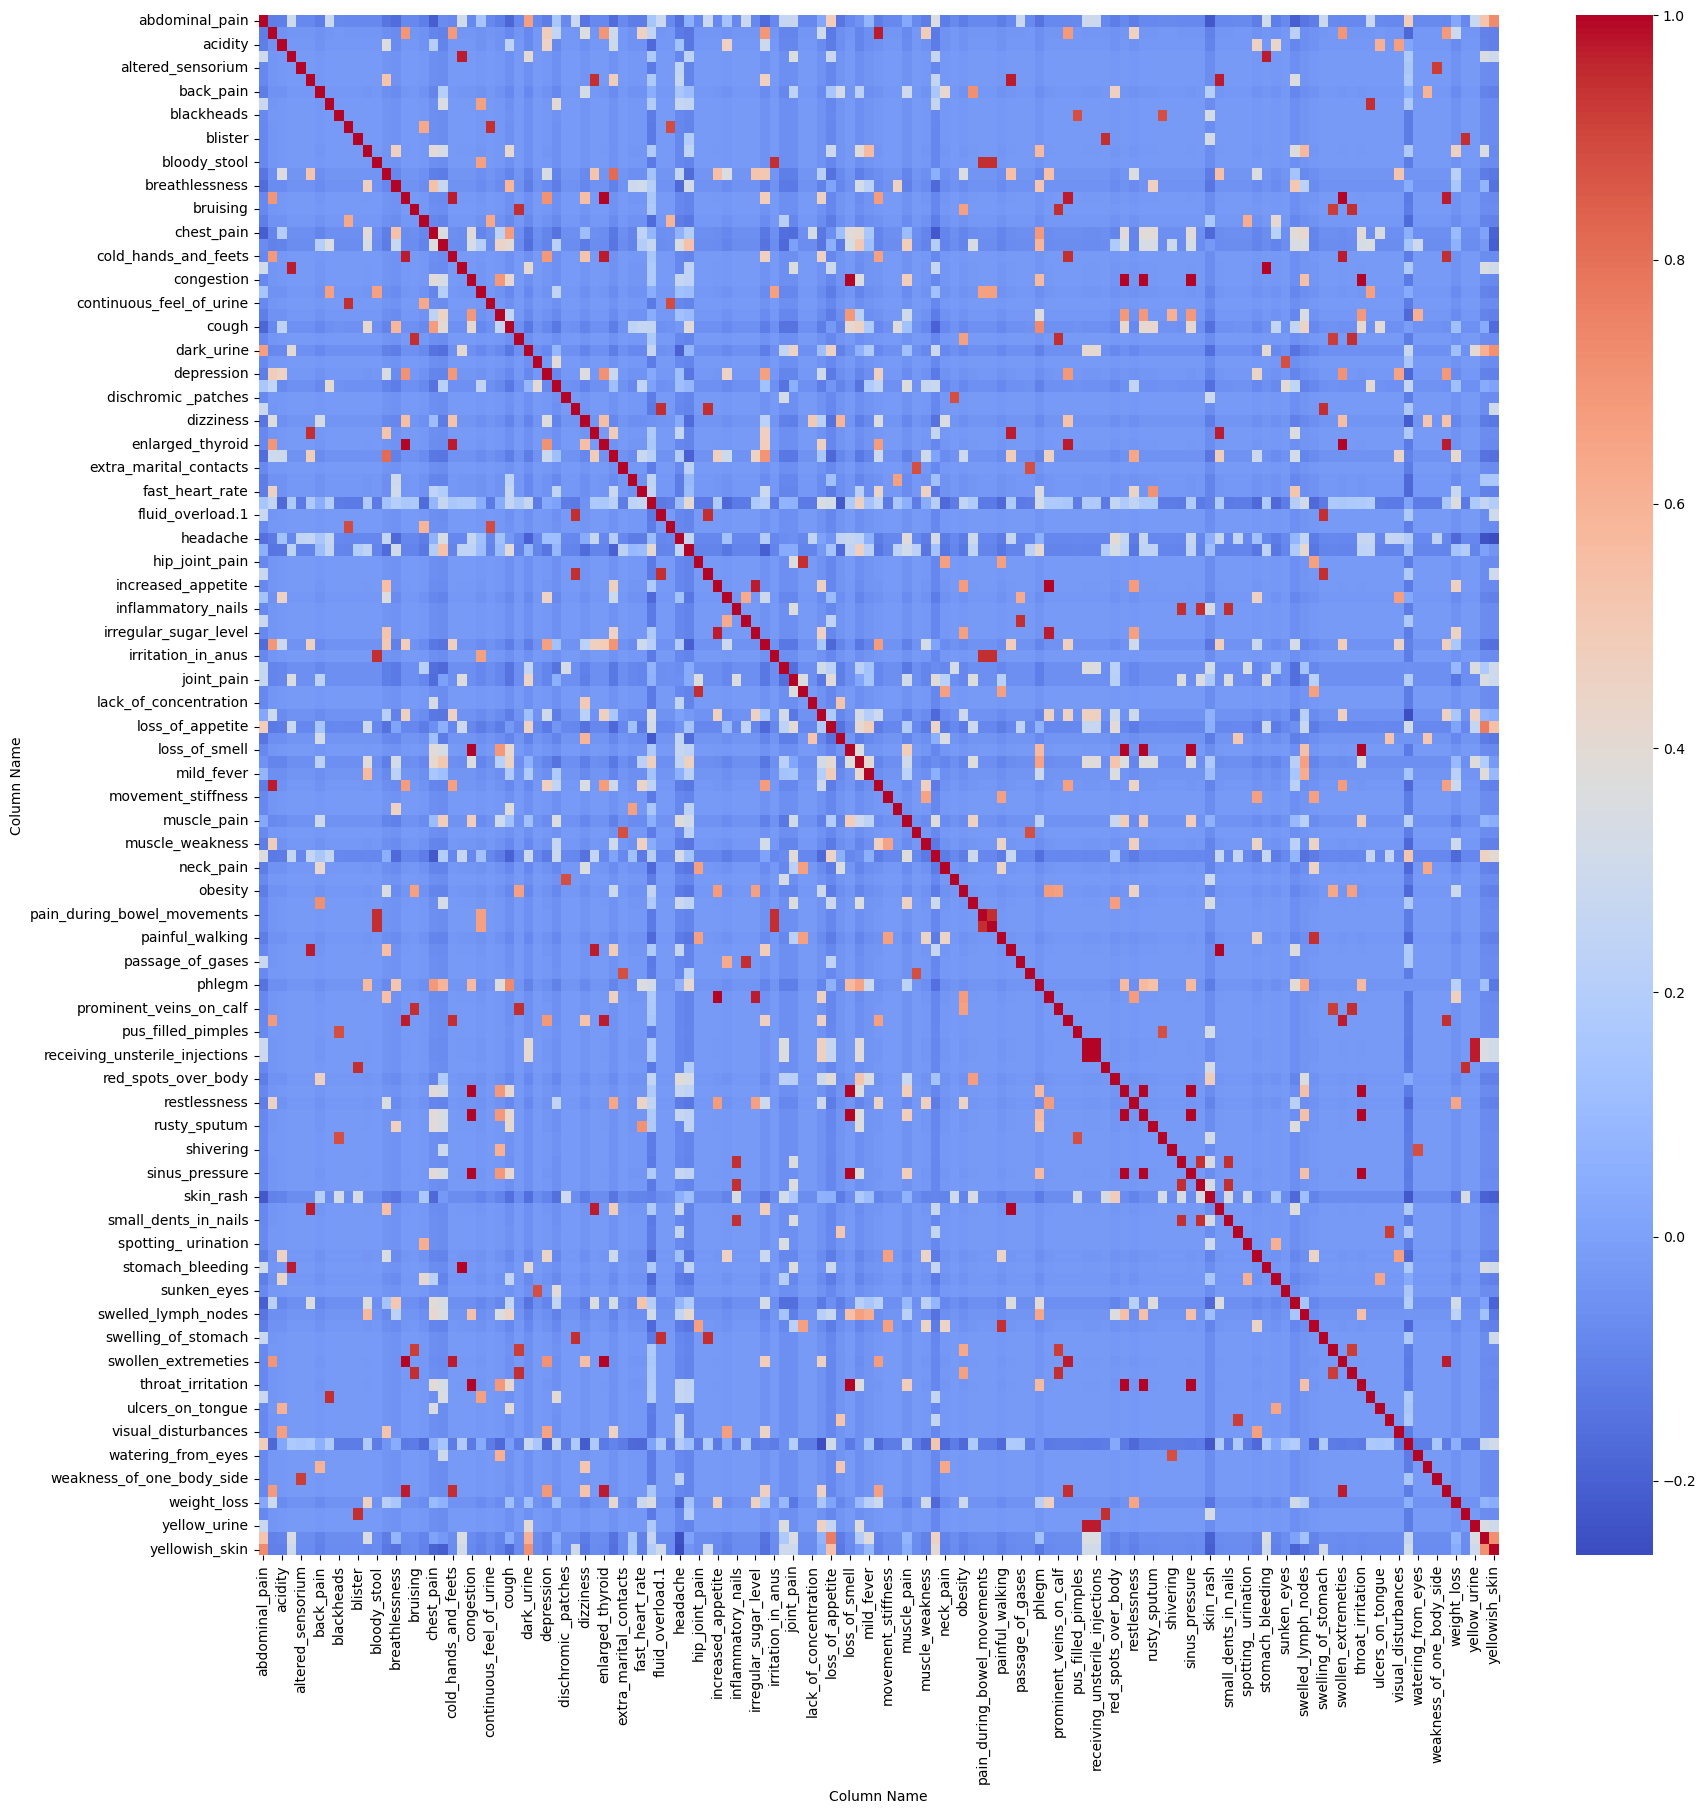

In [87]:
# Next the concept is to create a correlation matrix between the variables 
correlation_matrix = train_data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.set_context(rc={"figure.figsize": (20,20)})
heat_plot = sns.heatmap(correlation_matrix, annot=False, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.show()